<a href="https://colab.research.google.com/github/nraoamuktha/Academic_projects/blob/main/Section0502_Group08_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Tickers **(AMZN, AAPL)** from Yahoo Finance, for the period *12-31-2014 through 12-31-2019 (both dates inclusive)* have been downloaded as AMZN.csv and AAPL.csv.

In [1]:
# Import all the neccessary libraries
%matplotlib inline
import matplotlib as mpl
# Import pyplot as plt
import matplotlib.pyplot as pt
import pandas as pd

In [2]:
# Define function read price data
def read_price_data(filename, index_col=0, parse_dates=True):

    # Load the csv file into a new dataframe stock_hist
    stock_hist = pd.read_csv(filename, index_col=index_col ,parse_dates=parse_dates)

    # Verify dataframe information by highlighting the DatatimeIndex
    print('Stock Information:\n')
    print(f'{stock_hist.info()}\n')

    # Check the existence of null values
    print('NULL values check:\n')
    print(f'{stock_hist.isnull().sum()}\n')

    # Showcase the summary statistics
    print('Summary statistics:\n')
    print(f'{stock_hist.describe()}\n')

    # Verify the start dates
    print('Check the first few rows:\n')
    print(f'{stock_hist.head()}\n')

    # Verify the end dates
    print('Check the last few rows:\n')
    print(f'{stock_hist.tail()}\n')

    return stock_hist

In [3]:
# Read the stock price history file of AMZN
AMZN_df = read_price_data('AMZN.csv')

#Renaming the Adj_Close column to security name
#AMZN_df = AMZN_df.rename(columns = {'Adj Close': 'AMZN'})

Stock Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
None

NULL values check:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Summary statistics:

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     55.742699    56.241898    55.145867    55.720409    55.720409   
std      26.638782    26.865552    26.335057    26.610040    26.610040   
min      14.314000    14.539500    14.

In [4]:
# Read the stock price history file of AAPL
AAPL_df = read_price_data('AAPL.csv')

Stock Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
None

NULL values check:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Summary statistics:

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     38.591088    38.930586    38.260240    38.610385    36.438027   
std      11.001897    11.102899    10.925370    11.029889    11.229058   
min      22.500000    22.917500    22.

In [5]:
# Function to plot columns
def plot_and_format_y_axis(data_frame, formatter= mpl.ticker.ScalarFormatter() ,aspect_ratio=(12,8), title='', ylabel='', grid = True):

    pt.figure(figsize=aspect_ratio)
    for column in data_frame.columns:
        pt.plot(data_frame.index, data_frame[column], label=column)

    pt.title(title)
    pt.xlabel('Date')
    pt.ylabel(ylabel)
    pt.grid(grid)
    pt.legend()
    if formatter:
        pt.gca().yaxis.set_major_formatter(formatter)
    pt.show()

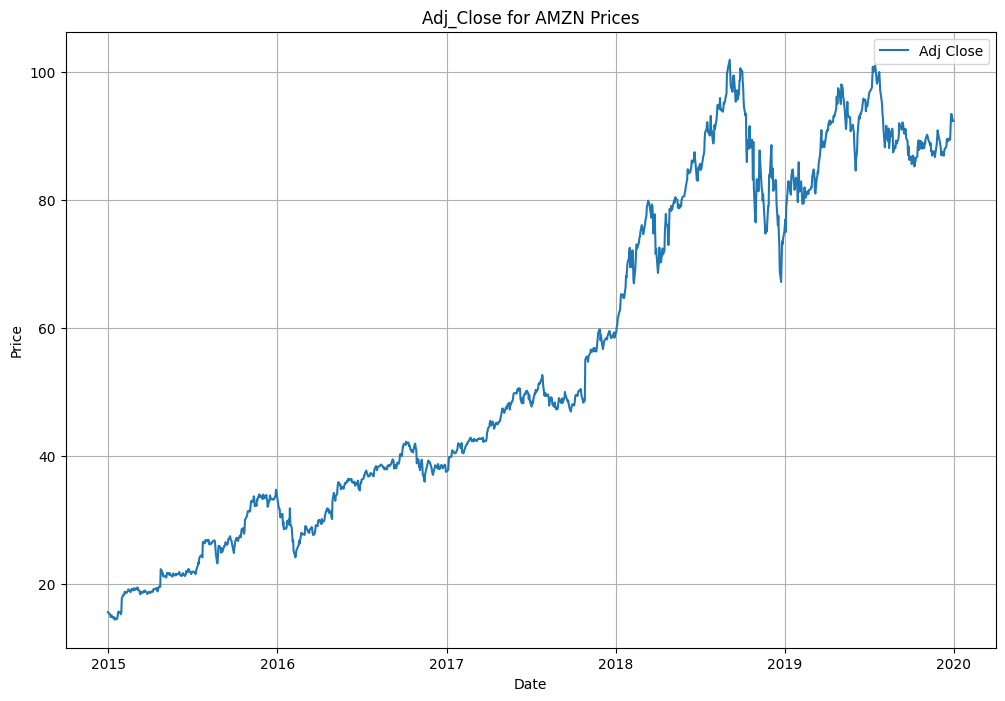

In [6]:
plot_and_format_y_axis(AMZN_df[['Adj Close']], title='Adj_Close for AMZN Prices', ylabel='Price')

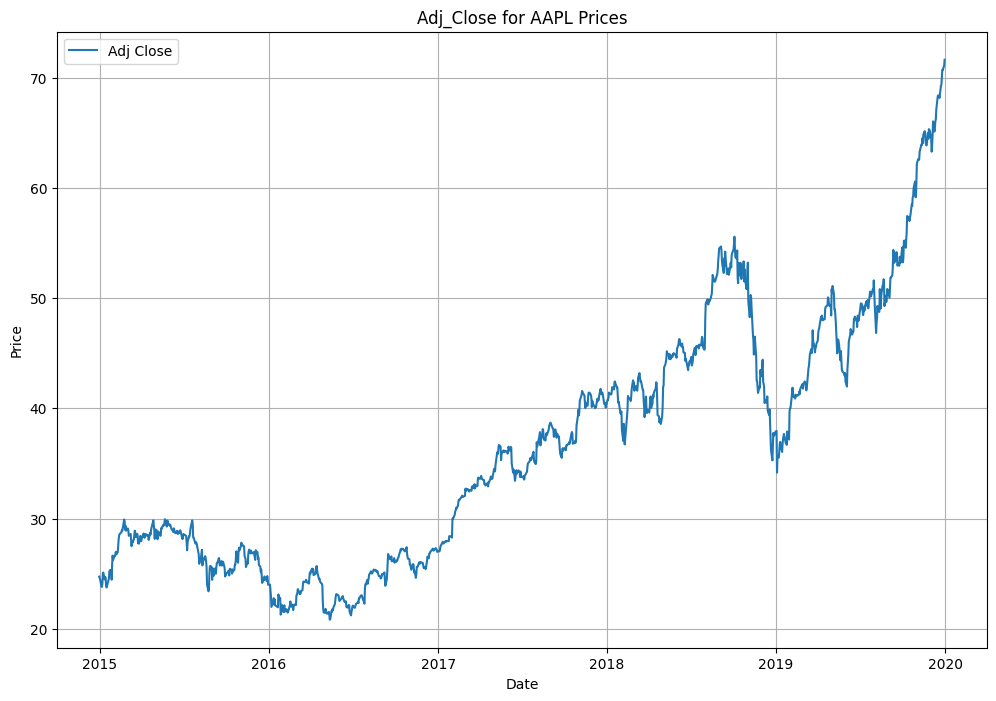

In [7]:
plot_and_format_y_axis(AAPL_df[['Adj Close']], title='Adj_Close for AAPL Prices', ylabel='Price')

In [8]:
# Extract the Adjusted close columns of both stocks
AMZN_adj = pd.DataFrame(AMZN_df['Adj Close'])
AAPL_adj = pd.DataFrame(AAPL_df['Adj Close'])

# Rename the columns of both dataframes
AMZN_adj.columns = ['AMZN']
AAPL_adj.columns = ['AAPL']

# Merge both stocks into a single dataframe
merged_adj_close = pd.merge(AMZN_adj, AAPL_adj, how='inner', left_index=True, right_index=True)
merged_adj_close

,AMZN,AAPL
Date,,
2014-12-31,15.517500,24.733967
2015-01-02,15.426000,24.498682
2015-01-05,15.109500,23.808519
2015-01-06,14.764500,23.810757
2015-01-07,14.921000,24.144629
...,...,...
2019-12-24,89.460503,69.327438
2019-12-26,93.438499,70.702934
2019-12-27,93.489998,70.676109


<Axes: title={'center': 'Adjusted Close Prices'}, xlabel='Date', ylabel='Price'>

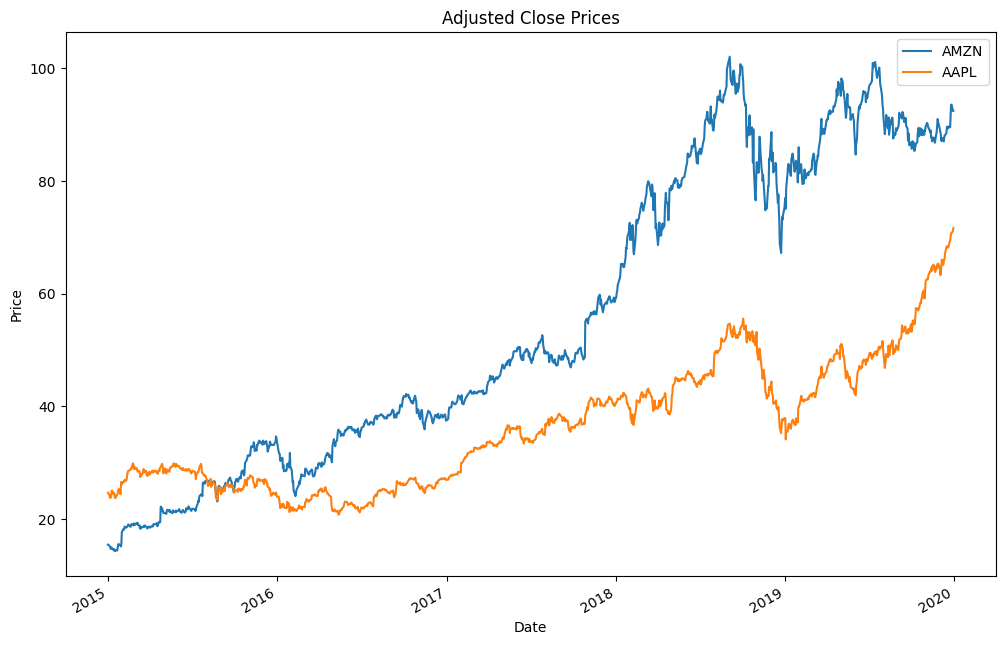

In [9]:
# Plot the adjusted close prices of securities
aspect_ratio = (12,8)
merged_adj_close.plot(figsize=aspect_ratio, title='Adjusted Close Prices', ylabel = 'Price')

**We pledge on our honor that we have not given nor received any unauthorized assistance on this
assignment to/from other groups.**

                             - Amuktha Nadipelli, Hamza Siddiqui, Lekhya Mudda, Shashank Patil